In [13]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.figure import Figure


In [24]:
df = pd.read_csv (r'F:\Chrome Downloads\climate.csv') # reading the csv file
df

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106
...,...,...,...,...
165080,USC00205822,2015-06-09,TMAX,256
165081,USC00205822,2009-10-06,TMAX,167
165082,USC00205050,2014-07-14,TMAX,283
165083,USC00200230,2006-11-29,TMIN,117


In [15]:
#separating a TempMAx and Tempmin coulns based on "element" parameter
df["TMAX"] = df[df["Element"] == "TMAX"]["Data_Value"]
df["TMIN"] = df[df["Element"] == "TMIN"]["Data_Value"]

#dropping the "Element" & "Data_value" column
df.pop("Element")
df.pop('Data_Value')

# Retriving day , month and year from the "Date" column
ddfo = df
ddfo['TMIN'].fillna(1000, inplace = True)
ddfo['TMAX'].fillna(0, inplace = True)
ddfo['Day'] = pd.DatetimeIndex(ddfo['Date']).day
ddfo['Month'] = pd.DatetimeIndex(ddfo['Date']).month
ddfo['Year'] = pd.DatetimeIndex(ddfo['Date']).year


# Creatig two datafrmaes ddf(data from 2004 - 2015) and ddfn(data of 2015)
ddf = ddfo[ddfo['Year'] != 2015]
ddf.pop('Date')
ddf.reset_index(inplace = True) 

ddfn = ddfo[ddfo['Year'] == 2015]
ddfn.pop('Date')
ddfn.reset_index(inplace = True) 

ddfn

,index,ID,TMAX,TMIN,Day,Month,Year
0,19,USC00205563,0.0,-39.0,3,1,2015
1,30,USC00203712,189.0,1000.0,17,3,2015
2,34,USC00200032,0.0,128.0,6,6,2015
3,46,USW00014833,0.0,178.0,30,8,2015
4,50,USC00202308,0.0,156.0,30,8,2015
...,...,...,...,...,...,...,...
13752,165054,USC00208080,0.0,-211.0,14,2,2015
13753,165056,USC00200228,-11.0,1000.0,23,2,2015
13754,165059,USC00207312,0.0,172.0,23,6,2015
13755,165072,USC00208080,0.0,-17.0,14,11,2015


In [16]:
#creating a list of number of days in each month( excluding leap years)
no_of_days = [ 31 , 28 , 31 , 30 , 31 , 30 , 31 , 31 , 30 , 31 , 30 , 31]

#calculating no of days untill previous months
nofprevdays = []
for i in range(1,13):
    nofprevdays.append(sum(no_of_days[:i -1]))

# adding day and no of days untill previous months to get the day of the year for "ddf"
dayofyr=[]
for i in range(0 , len(ddf["Month"])):
    dayofyr.append(  nofprevdays[(ddf["Month"][i] -1 )]  + ddf["Day"][i])
ddf["dayofyr"] = dayofyr

# calculating the no of days for "ddfn"
dayofyr1=[]

for i in range(0 , len(ddfn["Month"])):
    dayofyr1.append(  nofprevdays[(ddfn["Month"][i] -1 )]  + ddfn["Day"][i])
ddfn["dayofyr1"] = dayofyr1

ddfn

,index,ID,TMAX,TMIN,Day,Month,Year,dayofyr1
0,19,USC00205563,0.0,-39.0,3,1,2015,3
1,30,USC00203712,189.0,1000.0,17,3,2015,76
2,34,USC00200032,0.0,128.0,6,6,2015,157
3,46,USW00014833,0.0,178.0,30,8,2015,242
4,50,USC00202308,0.0,156.0,30,8,2015,242
...,...,...,...,...,...,...,...,...
13752,165054,USC00208080,0.0,-211.0,14,2,2015,45
13753,165056,USC00200228,-11.0,1000.0,23,2,2015,54
13754,165059,USC00207312,0.0,172.0,23,6,2015,174
13755,165072,USC00208080,0.0,-17.0,14,11,2015,318


In [17]:

# creating the x and y values to plot



obsermaxmonth = []
obsermaxvalue = []
obserminivalue=[]
obserminimonth =[]

#finding max and min of nth day of the year among all the n days in the list
for group , frame in ddf.groupby('dayofyr'):
    maxi = np.max(frame['TMAX'])
    obsermaxmonth.append(group)
    obsermaxvalue.append(maxi)
for group , frame in ddf.groupby('dayofyr'):
    mini = np.min(frame['TMIN'])
    obserminimonth.append(group)
    obserminivalue.append(mini)

obsermaxmonth1 = []
obsermaxvalue1 = []
obserminivalue1=[]
obserminimonth1 =[]
for group , frame in ddfn.groupby('dayofyr1'):
    maxi = np.max(frame['TMAX'])
    obsermaxmonth1.append(group)
    obsermaxvalue1.append(maxi)
for group , frame in ddfn.groupby('dayofyr1'):
    mini = np.min(frame['TMIN'])
    obserminimonth1.append(group)
    obserminivalue1.append(mini)


#finding the temp in 2015 that are record highand record lowest 
for i in range(0 , len(obsermaxvalue1)):
    if obsermaxvalue1[i] < obsermaxvalue[i] :
        obsermaxvalue1[i] = 0

for i in range(0 , len(obserminivalue1)):
    if obserminivalue1[i] > obserminivalue[i] :
        obserminivalue1[i] = 100


#assinging values of days  to just those that have a record high temp in "ddfn"
obsermaxmonth1 = [ obsermaxmonth1 [i] for i  in range(0 , len(obsermaxvalue1)) if obsermaxvalue1[i] != 0 ]
obsermaxvalue1 = [ obsermaxvalue1 [i] for i  in range(0 , len(obsermaxvalue1)) if obsermaxvalue1[i] != 0 ]

obserminimonth1 = [ obserminimonth1 [i] for i  in range(0 , len(obserminivalue1)) if obserminivalue1[i] != 100]
obserminivalue1 = [ obserminivalue1 [i] for i  in range(0 , len(obserminivalue1)) if obserminivalue1[i] != 100]

<Figure size 432x288 with 0 Axes>

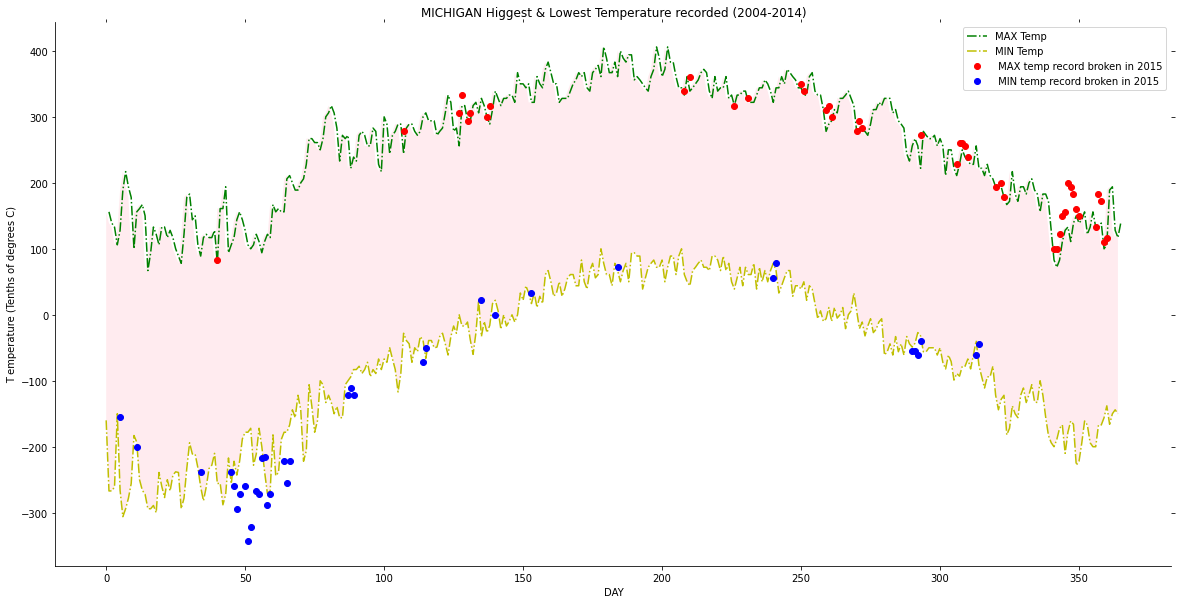

In [31]:
#plotting a graph of size (20 , 10)
plt.figure( )
fig = plt.figure(figsize=(20 , 10)) 

# g , y , r, b are the colors of plotted item
plt.plot(obserminimonth ,obsermaxvalue , "-.g" , obserminivalue , "-.y" )
plt.plot( obsermaxmonth1 , obsermaxvalue1  , "or" )
plt.plot(obserminimonth1 , obserminivalue1  , "ob" )

#to fill the area between higgest temp and lowes temp that represnt the normal temp of Michigan
plt.gca().fill_between(range(len(obsermaxvalue)),
                        obsermaxvalue, obserminivalue,
                        facecolor = 'pink' ,
                        alpha = 0.30)


#labele
plt.xlabel("DAY")
plt.ylabel("T emperature (Tenths of degrees C)")
plt.title("MICHIGAN Higgest & Lowest Temperature recorded (2004-2014)")
plt.legend(["MAX Temp" ,"MIN Temp" , " MAX temp record broken in 2015" , " MIN temp record broken in 2015" ])


# showing the axics marks on top and right
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

# hiding the order on right and top
ax = plt.subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [33]:
#saving the graph as png / jpg

canvas = FigureCanvasAgg(fig)
canvas.print_png('Kay.png') 
Or 
fig.savefig('K.jpg', bbox_inches='tight', dpi=150)